# LAB 3

In [1]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
import skimage as sk
import pandas as pd
import pickle

Consider the SPECT imaging of the 2D phantom stored in derenzo.mat, containing several
hot spots of different sizes, with FOV = 256 x 256 mm2. For the exercise, assume a parallel
beam geometry with a rotation increment of 0.5º and a maximum number of photon counts of
255. Please note that, given that a 2D phantom is considered, only 1 of the 2 dimensions of the
gamma camera is used in this simulation.

## **Question 1**

Load the phantom, get its dimensions, and display it.

The range of values is 0.0 to 1.0
The dimensions are (256, 256) pixels


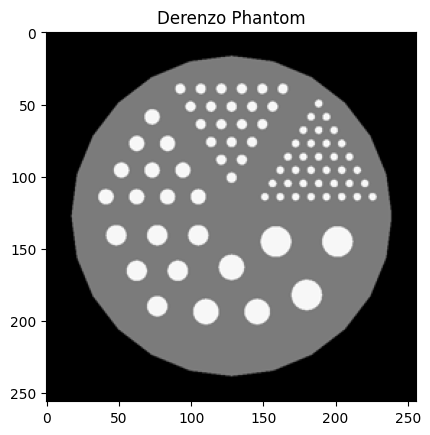

In [2]:
# load the phantom
derenzo = loadmat('derenzo.mat')
derenzo_im = derenzo['derenzo']

derenzo_im = (derenzo_im-np.min(derenzo_im))/(np.max(derenzo_im)-np.min(derenzo_im)) # normalize the image

# check normalization, print the range of values
print("The range of values is " + str(np.min(derenzo_im)) + " to " + str(np.max(derenzo_im)))

# get derenzo size
derenzo_size = np.shape(derenzo_im)
print("The dimensions are " + str(derenzo_size) + " pixels")

# display the image
plt.figure()
plt.title('Derenzo Phantom')
plt.imshow(derenzo['derenzo'], cmap='gray')

Derenzo phantoms are used to characterize an imaging system’s resolution by measuring the FWHM of hole patterns with varying diameters and spacing. Source: https://medilumine.com/product/fillable-derenzo-phantom-for-pet-or-spect-imaging

The phantom's dimensions are equal to the FOV, which means that one pixel measures 1 mm, so the spatial resolution R is limited to 1 mm, which is very low spatial resolution compared to other imaging techniques.</font>

## **Question 2**
Simulate the sinogram and reconstructed SPECT image of the phantom by filtered
back-projection, first without and then with noise (using the random.poisson
function of the numpy library; note that values need to be converted to uint8 type prior
to applying this function).

The range of values of the reconstructed image is 0.0 to 1.0


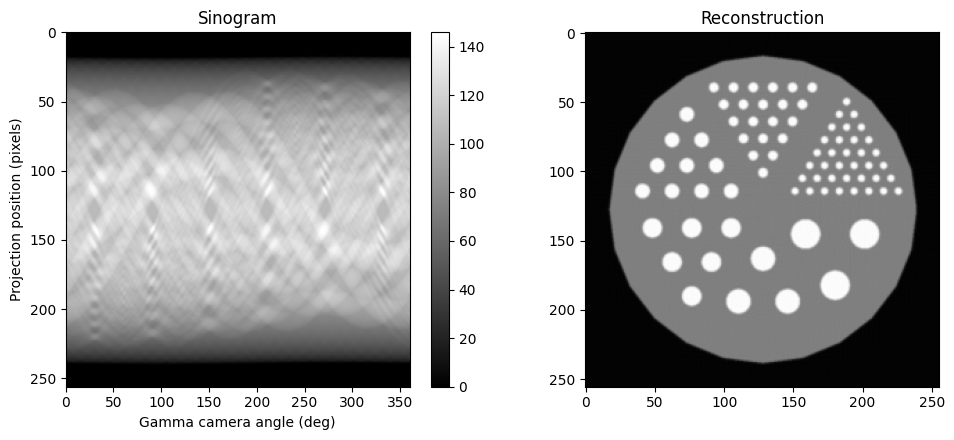

(256, 256)
The range of values of the reconstructed image with noise is 0.0 to 1.0


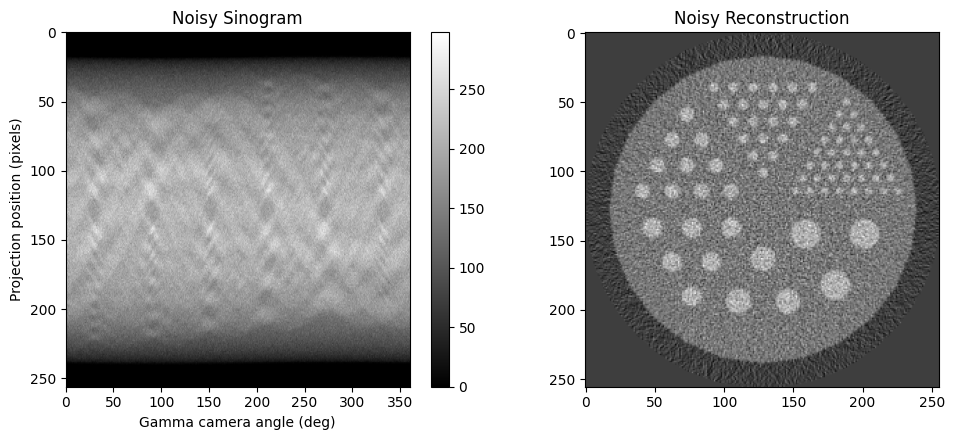

In [3]:
# sinogram and reconstruction without noise

# get the sinogram

# build a theta vector from 0 to 359 with a step of 0.5
theta = np.arange(0, 360, 0.5)

sinogram = sk.transform.radon(derenzo_im, theta=theta, preserve_range=True)

# reconstruct
reconstruction = sk.transform.iradon(sinogram, theta=theta, circle=True, output_size = 256)
# normalize the image
reconstruction = (reconstruction-np.min(reconstruction))/(np.max(reconstruction)-np.min(reconstruction))
# check normalization, print the range of values
print("The range of values of the reconstructed image is " + str(np.min(reconstruction)) + " to " + str(np.max(reconstruction)))


# display sinogram and reconstruction in the same figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
ax1.set_title("Sinogram")
ax1.set_xlabel("Gamma camera angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
sincb = ax1.imshow(sinogram, cmap='gray', extent=[0, 360, 256, 0], aspect='auto')
ax2.set_title("Reconstruction")
ax2.imshow(reconstruction, cmap='gray')
fig.tight_layout()
plt.colorbar(sincb)
plt.show()

# get the size of the rec

rec_size = np.shape(reconstruction)
print(rec_size)

# sinogram and reconstruction with noise

sin_aux = (sinogram*255)/(np.max(sinogram))
sin_auxf = sin_aux.astype(np.uint8)
sin_noise = np.random.poisson(sin_auxf, size = np.shape(sin_aux))

# reconstruct
reconstruction_noise = sk.transform.iradon(sin_noise, theta=theta, circle = True, output_size = 256)
# normalize the image
reconstruction_noise = (reconstruction_noise-np.min(reconstruction_noise))/(np.max(reconstruction_noise)-np.min(reconstruction_noise))
# check normalization, print the range of values
print("The range of values of the reconstructed image with noise is " + str(np.min(reconstruction_noise)) + " to " + str(np.max(reconstruction_noise)))

# display noisy sinogram and reconstruction in the same figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
ax1.set_title("Noisy Sinogram")
ax1.set_xlabel("Gamma camera angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
sincb1 = ax1.imshow(sin_noise, cmap='gray', extent=[0, 360, 256, 0], aspect='auto')
ax2.set_title("Noisy Reconstruction")
ax2.imshow(reconstruction_noise, cmap='gray')
fig.tight_layout()
plt.colorbar(sincb1)
plt.show()





The sinograms represent a set of integrated values of the spatial distribution of the administered radiopharmaceutical's acitivity along different positions of the gamma camera.

What artifacts can we see from the reconstructions? Since we can never use continuum of angles, there are always slight streak artifacts, although sometimes more visible. Additionally, since we applied Poisson Noise, static noise artifacts can be observed.

In this case, we are rotating 360º, since it works better than 180º for SPECT imaging. 

## **Question 3**
Define appropriate ROIs for one of the big, the medium, and the small hotspots (using
roipoly in Matlab /Python).

In [6]:
from roipoly import RoiPoly
import matplotlib
# RoiPoly requires a different matplotlib backend
%matplotlib tk
print("Using.... ", matplotlib.pyplot.get_backend())

plt.figure('Drawing an ROI')
plt.imshow(derenzo_im, cmap='gray')
plt.title('Select a small ROI')
small_roi = RoiPoly(color='r')
plt.imshow(derenzo_im, cmap='gray')
plt.title('Select a medium ROI')
med_roi = RoiPoly(color='b')
plt.imshow(derenzo_im, cmap='gray')
plt.title('Select a big ROI')
big_roi = RoiPoly(color='g')
#plt.imshow(derenzo_im, cmap='gray')
#plt.title('Select a background noise mask')
#noise_roi = RoiPoly(color='k')



Using....  TkAgg


In [4]:
#draw the rois and run ONCE to save them
#ONCE THEY ARE SAVE DO NOT RUN AGAIN!!!
with open('small_roi', 'wb') as small_roi_file:
  pickle.dump(small_roi, small_roi_file)
with open('med_roi', 'wb') as med_roi_file:
  pickle.dump(med_roi, med_roi_file)
with open('big_roi', 'wb') as big_roi_file:
  pickle.dump(big_roi, big_roi_file)

NameError: name 'small_roi' is not defined

In [5]:
#load previously stored rois
with open('small_roi', 'rb') as small_roi_file:
    small_roi = pickle.load(small_roi_file)

with open('med_roi', 'rb') as med_roi_file:
    med_roi = pickle.load(med_roi_file)

with open('big_roi', 'rb') as big_roi_file:
    big_roi = pickle.load(big_roi_file)

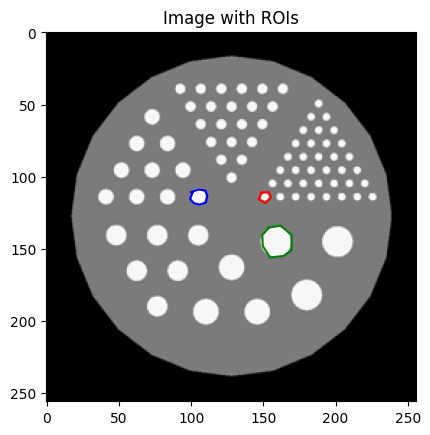

In [6]:
%matplotlib inline
# display the image with the rois
plt.figure()
plt.title('Image with ROIs')
plt.imshow(derenzo_im, cmap='gray')
small_roi.display_roi()
med_roi.display_roi()
big_roi.display_roi()

## **Question 4**
Illustrate and quantify the partial volume effects (PVE’s) in the reconstructed image, by
performing the following analysis and comparing the results with those obtained from
the phantom (ground truth):


a) Plot the intensity profile of a specific line in the object/image, going through various
hot spots;

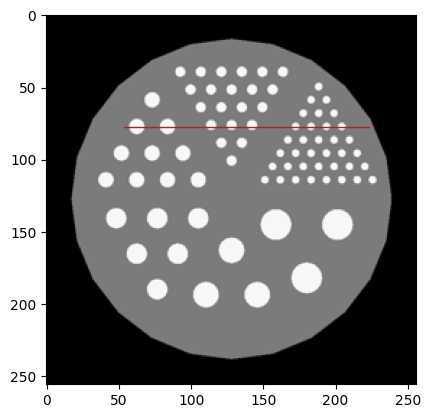

In [7]:
# draw the chosen line over the image
x1 = [53.3, 223.3]
y1 = [77.0,77.0]

plt.figure()
plt.imshow(derenzo_im, cmap='gray')
plt.plot(x1, y1, color="red", linewidth=1)
plt.show()

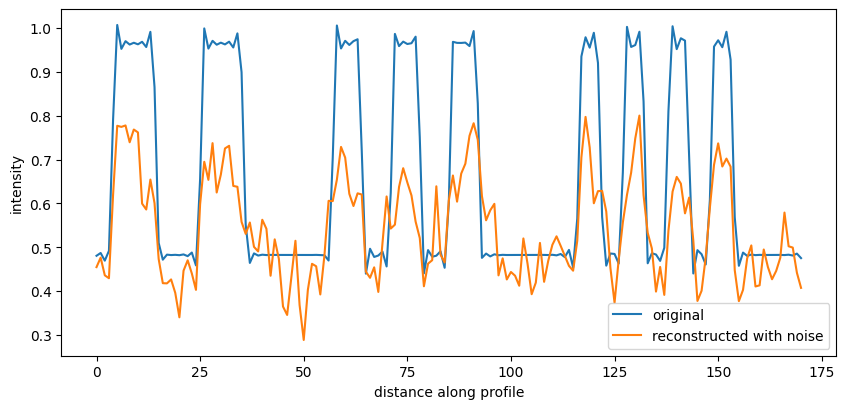

In [8]:
# define a profile line and get intensities in the og image
prof = sk.measure.profile_line(derenzo_im, (77.0, 53.3), (77.0, 223.3), linewidth=1, order=5)
# same profile along the reconstructed image
#prof_rec = sk.measure.profile_line(reconstruction, (103, 203.2), (191.3, 44.2), linewidth=1)

# same profile along the reconstructed image with noise
prof_rec_noise = sk.measure.profile_line(reconstruction_noise, (77.0, 53.3), (77.0, 223.3), linewidth=1)

plt.figure(figsize=(10, 4.5))
plt.plot(prof)
#plt.plot(prof_rec)
plt.plot(prof_rec_noise)
#plt.legend(['original', 'reconstructed', 'reconstructed with noise'])
plt.legend(['original', 'reconstructed with noise'])
plt.ylabel('intensity')
plt.xlabel('distance along profile')
plt.show()

The line drawn goes through nine different hotspots and we can see nine different peaks in the original profile line intensity. The length of the peaks is proportional to the size of the hotspots. Adding noise to the reconstruction leads to more peaks in the profile line intensity (representing the noise's intesity). Additionally, the overall intensities also decrease, which is in accordance to an overall "gray"-er image with blurred edges, the hotspots aren't so bright due to the noise - underestimation of the activity as a result of partial volume effects(PVEs). We can see that some hotspots peaks are (almost) at the level of the noise peaks, which can lead these peaks to be undetected - insensitivity to the detection of hot spots due to PVEs. These effects are predominantly for the smaller hotspots, as expected. This effect is more predominant in smaller hotspots.

b) Compute the average image intensities and SNR in each ROI.

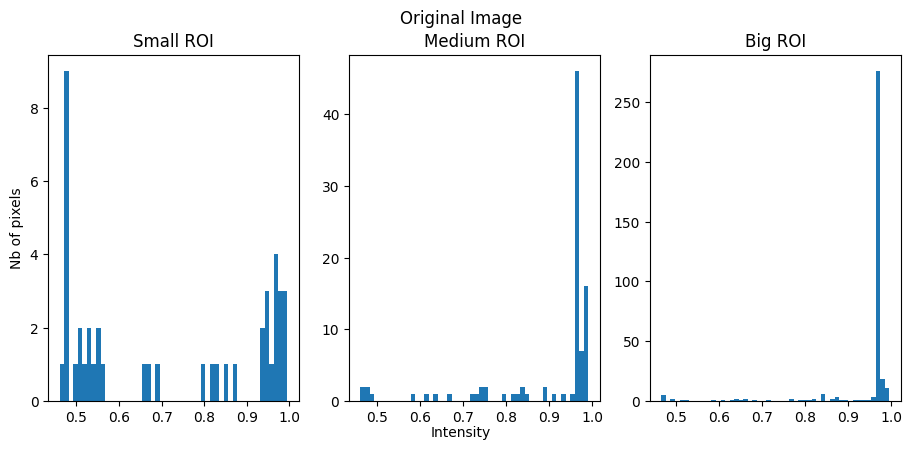

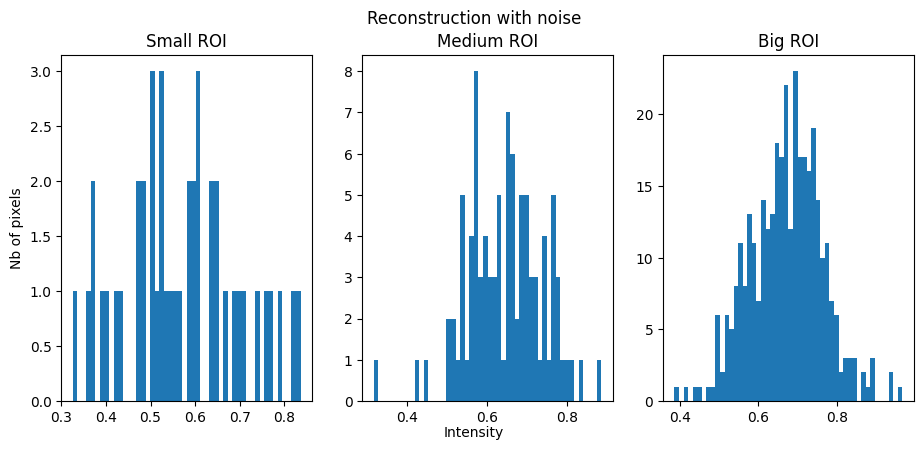

In [9]:
# masks
small_mask = small_roi.get_mask(derenzo_im)
med_mask = med_roi.get_mask(derenzo_im)
big_mask = big_roi.get_mask(derenzo_im)

# histogram of each ROI intensity in a subplot
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(11, 4.5))
fig.suptitle("Original Image")
ax1.hist(derenzo_im[small_mask], bins=50)
ax1.set_title('Small ROI')
ax1.set_ylabel('Nb of pixels')
ax2.hist(derenzo_im[med_mask], bins=50)
ax2.set_title('Medium ROI')
ax3.hist(derenzo_im[big_mask], bins=50)
ax3.set_title('Big ROI')
fig.text(0.5, 0.03, 'Intensity', ha='center')
plt.show()

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(11, 4.5))
fig.suptitle("Reconstruction with noise")
ax1.hist(reconstruction_noise[small_mask], bins=50)
ax1.set_title('Small ROI')
ax1.set_ylabel('Nb of pixels')
ax2.hist(reconstruction_noise[med_mask], bins=50)
ax2.set_title('Medium ROI')
ax3.hist(reconstruction_noise[big_mask], bins=50)
ax3.set_title('Big ROI')
fig.text(0.5, 0.03, 'Intensity', ha='center')
plt.show()

As we can see from the original picture, there's a larger number of pixels with higher values (i.e., brighter pixels in the image) for the bigger and medium ROIs. For the smaller ROI, there's a mixture of dark and bright values because it is much harder to precisely select just the small hotspot without the darker pixels that surround it. Regarding the histograms for the reconstructions with noise, they just show us that the noise follows a Poission distribution.

In [10]:
# calculate average intensity in the ROIs for the original image

# masks
small_mask = small_roi.get_mask(derenzo_im)
med_mask = med_roi.get_mask(derenzo_im)
big_mask = big_roi.get_mask(derenzo_im)

# calculate the average intensity in the ROIs for the original image
average_small = np.mean(derenzo_im[small_mask])
average_med = np.mean(derenzo_im[med_mask])
average_big = np.mean(derenzo_im[big_mask])

# calculate the average intensity in the ROIs for the reconstruction with noise
average_small_noise = np.mean(reconstruction_noise[small_mask])
average_med_noise = np.mean(reconstruction_noise[med_mask])
average_big_noise = np.mean(reconstruction_noise[big_mask])

# calculate the differences to better estimate the underestimation of activity
dif_small=average_small-average_small_noise
dif_med=average_med-average_med_noise
dif_big=average_big-average_big_noise

# calculate std for each ROI for the reconstruction with noise
std_small_noise = np.std(reconstruction_noise[small_mask])
std_med_noise = np.std(reconstruction_noise[med_mask])
std_big_noise = np.std(reconstruction_noise[big_mask])

print('\x1b[1;31m'+"Average Intensity of the small ROI in: " + '\x1b[0m')
print("Original image: " + str(round(average_small,3)))
print("Reconstruction with noise: " + str(round(average_small_noise,3)))
print("Difference: " + str(round(dif_small, 3))+ "\n")

print('\x1b[1;31m'+ "Average Intensity of the medium ROI in: " + '\x1b[0m' )
print("Original image: " + str(round(average_med,3)))
print("Reconstruction with noise: " + str(round(average_med_noise,3)))
print("Difference: " + str(round(dif_med, 3))+ "\n")

print('\x1b[1;31m'+ "Average Intensity of the big ROI in: " + '\x1b[0m' )
print("Original image: " + str(round(average_big,3)))
print("Reconstruction with noise: " + str(round(average_big_noise,3)))
print("Difference: " + str(round(dif_big, 3))+ "\n")



Average Intensity of the small ROI in: 
Original image: 0.72
Reconstruction with noise: 0.568
Difference: 0.152

Average Intensity of the medium ROI in: 
Original image: 0.903
Reconstruction with noise: 0.644
Difference: 0.259

Average Intensity of the big ROI in: 
Original image: 0.938
Reconstruction with noise: 0.672
Difference: 0.266



With this, we're able to quantify the underestimation of activity due to PVEs. Since PVE is more noticeable in small hotspots, we would expect to see a larger difference of average intensities in the small ROI, however, likely due to the image being too nosy and to the ROIs not being perfectly drawn, the largest difference is seen in the big ROI.

In [12]:
# calculate SNR for each ROI rec with noise
snr_small_rec_noise = average_small_noise/std_small_noise
snr_med_rec_noise = average_med_noise/std_med_noise
snr_big_rec_noise = average_big_noise/std_big_noise


print('\x1b[1;31m'+"For the small ROI, the SNR is: " + '\x1b[0m')
print("Reconstruction with noise: " + str(round(snr_small_rec_noise,3)) + "\n")

print('\x1b[1;31m'+"For the medium ROI, the SNR is: " + '\x1b[0m')
print("Reconstruction with noise: " + str(round(snr_med_rec_noise,3)) + "\n")

print('\x1b[1;31m'+"For the big ROI, the SNR is: "+ '\x1b[0m')
print("Reconstruction with noise: " + str(round(snr_big_rec_noise,3)) + "\n")



For the small ROI, the SNR is: 
Reconstruction with noise: 4.476

For the medium ROI, the SNR is: 
Reconstruction with noise: 6.803

For the big ROI, the SNR is: 
Reconstruction with noise: 7.332



If the SNR is not sufficient, this can lead to insensitivy in detecing hotspots and they can go unoticable. In this case, to calculate the SNR we're using the hotspots average intensity divided by the standard deviation of the same hotspot. This can be done since Poisson noise is signal dependent. 

## **Question 5**
Repeat the analysis in 4., by now changing the spatial resolution and/or the SNR of the image (through manipulation of the appropriate image acquisition parameters).

Range of values in the reconstructed image with noise and Hann filter: 0.0 - 1.0


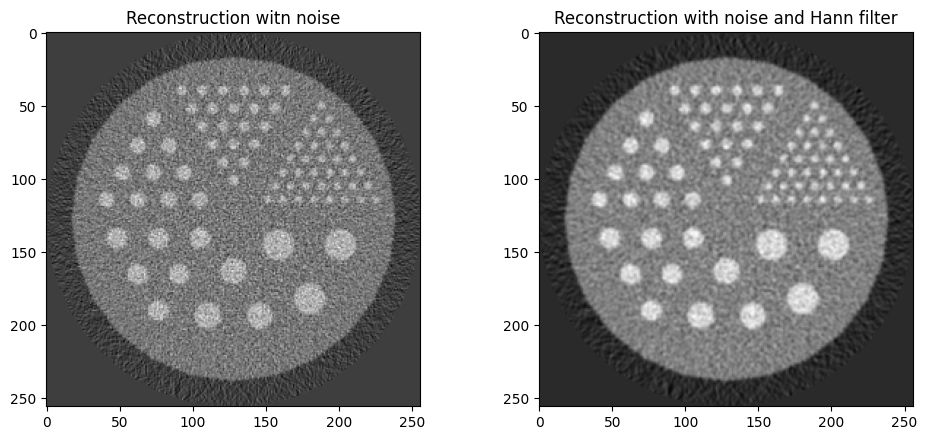

In [13]:
# changing the spatial resolution by applying hann filter in reconstruction

# hann filter --> enhances lower frequencies --> increases blurring --> lower spatial resolution (higher R)

reconstruction_noise_hann = sk.transform.iradon(sin_noise, theta=theta, circle = True, filter_name = 'hann')

#normalize the image
reconstruction_noise_hann = (reconstruction_noise_hann-np.min(reconstruction_noise_hann))/(np.max(reconstruction_noise_hann)-np.min(reconstruction_noise_hann))
# print range of values
print("Range of values in the reconstructed image with noise and Hann filter: " + str(np.min(reconstruction_noise_hann)) + " - " + str(np.max(reconstruction_noise_hann)))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
ax1.set_title("Reconstruction witn noise")
ax1.imshow(reconstruction_noise,cmap="gray")
ax2.set_title("Reconstruction with noise and Hann filter")
ax2.imshow(reconstruction_noise_hann, cmap='gray')
fig.tight_layout()
plt.show()

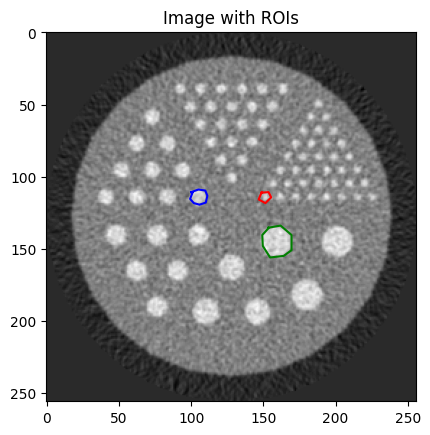

In [14]:
# plot the ROIs over the reconstructed image
plt.figure()
plt.title('Image with ROIs')
plt.imshow(reconstruction_noise_hann, cmap='gray')
small_roi.display_roi()
med_roi.display_roi()
big_roi.display_roi()

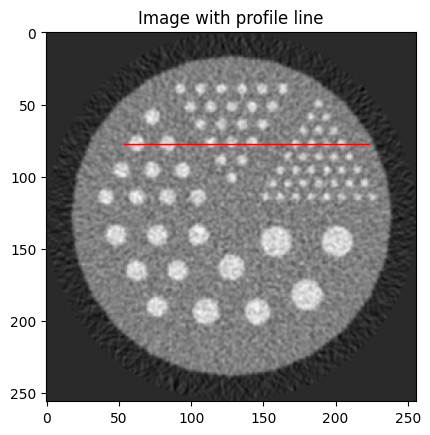

In [15]:
# plot profile line over the image

x1 = [53.3, 223.3]
y1 = [77.0,77.0]

plt.figure()
plt.imshow(reconstruction_noise_hann, cmap='gray')
plt.plot(x1, y1, color="red", linewidth=1)
plt.title('Image with profile line')
plt.show()


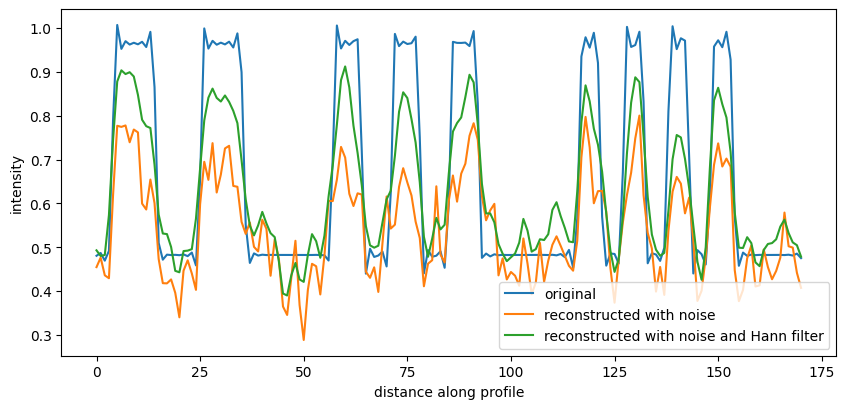

In [16]:
# plot intensity over profile line

prof_hann = sk.measure.profile_line(reconstruction_noise_hann, (77.0, 53.3), (77.0, 223.3), linewidth=1)

plt.figure(figsize=(10, 4.5))
plt.plot(prof)
plt.plot(prof_rec_noise)
plt.plot(prof_hann)
plt.legend(['original', 'reconstructed with noise', 'reconstructed with noise and Hann filter'])
plt.ylabel('intensity')
plt.xlabel('distance along profile')
plt.show()



Hann filtering leads to blurrier edges and overall Partial Volume Effects. The step like intensities become more "smoothed out". In extreme cases, some hotspots would even disappear.

In [17]:
# calculate the average intensity in the ROIs for the reconstruction with noise and Hann filter
average_small_noise_hann = np.mean(reconstruction_noise_hann[small_mask])
average_med_noise_hann = np.mean(reconstruction_noise_hann[med_mask])
average_big_noise_hann = np.mean(reconstruction_noise_hann[big_mask])

dif_small_hann=average_small-average_small_noise_hann
dif_med_hann=average_med-average_med_noise_hann
dif_big_hann=average_big-average_big_noise_hann

print('\x1b[1;31m'+"Average Intensity of the small ROI in: " + '\x1b[0m')
print("Original image: " + str(round(average_small,3)))
print("Reconstruction with noise: " + str(round(average_small_noise,3)))
print("Reconstruction with noise and Hann filter: " + str(round(average_small_noise_hann,3)))
print("Difference between the original and rec: " + str(round(dif_small, 3)))
print("Difference between the original and rec with Hann: " + str(round(dif_small_hann, 3))+ "\n")

print('\x1b[1;31m'+"Average Intensity of the medium ROI in: " + '\x1b[0m' )
print("Original image: " + str(round(average_med,3)))
print("Reconstruction with noise: " + str(round(average_med_noise,3)))
print("Reconstruction with noise and Hann filter: " + str(round(average_med_noise_hann,3)))
print("Difference between the original and rec: " + str(round(dif_med, 3)))
print("Difference between the original and rec with Hann: " + str(round(dif_med_hann, 3))+ "\n")

print('\x1b[1;31m'+"Average Intensity of the big ROI in: " + '\x1b[0m')
print("Original image: " + str(round(average_big,3)))
print("Reconstruction with noise: " + str(round(average_big_noise,3)))
print("Reconstruction with noise and Hann filter: " + str(round(average_big_noise_hann,3)))
print("Difference between the original and rec: " + str(round(dif_big, 3)))
print("Difference between the original and rec with Hann: " + str(round(dif_big_hann, 3))+ "\n")


Average Intensity of the small ROI in: 
Original image: 0.72
Reconstruction with noise: 0.568
Reconstruction with noise and Hann filter: 0.658
Difference between the original and rec: 0.152
Difference between the original and rec with Hann: 0.062

Average Intensity of the medium ROI in: 
Original image: 0.903
Reconstruction with noise: 0.644
Reconstruction with noise and Hann filter: 0.762
Difference between the original and rec: 0.259
Difference between the original and rec with Hann: 0.141

Average Intensity of the big ROI in: 
Original image: 0.938
Reconstruction with noise: 0.672
Reconstruction with noise and Hann filter: 0.81
Difference between the original and rec: 0.266
Difference between the original and rec with Hann: 0.127



In [18]:
# calculate std for each roi with noise and hann filter
std_small_noise_hann = np.std(reconstruction_noise_hann[small_mask])
std_med_noise_hann = np.std(reconstruction_noise_hann[med_mask])
std_big_noise_hann = np.std(reconstruction_noise_hann[big_mask])

# calculate SNR for each ROI rec with noise and hann filter
snr_small_rec_noise_hann = average_small_noise_hann/std_small_noise_hann
snr_med_rec_noise_hann = average_med_noise_hann/std_med_noise_hann
snr_big_rec_noise_hann = average_big_noise_hann/std_big_noise_hann


print('\x1b[1;31m'+ "For the small ROI, the SNR is: " + '\x1b[0m')
print("Reconstruction with noise: " + str(round(snr_small_rec_noise,3)))
print("Reconstruction with noise and Hann filter: " + str(round(snr_small_rec_noise_hann,3)) + "\n")

print('\x1b[1;31m'+ "For the medium ROI, the SNR is: " + '\x1b[0m')
print("Reconstruction with noise: " + str(round(snr_med_rec_noise,3)))
print("Reconstruction with noise and Hann filter: " + str(round(snr_med_rec_noise_hann,3)) + "\n")

print('\x1b[1;31m'+ "For the big ROI, the SNR is: "+ '\x1b[0m')
print("Reconstruction with noise: " + str(round(snr_big_rec_noise,3)))
print("Reconstruction with noise and Hann filter: " + str(round(snr_big_rec_noise_hann,3)) + "\n")



For the small ROI, the SNR is: 
Reconstruction with noise: 4.476
Reconstruction with noise and Hann filter: 6.039

For the medium ROI, the SNR is: 
Reconstruction with noise: 6.803
Reconstruction with noise and Hann filter: 9.053

For the big ROI, the SNR is: 
Reconstruction with noise: 7.332
Reconstruction with noise and Hann filter: 10.549



Although the image is blurrier, the Hann Filter reduces higher frequencies, therefore reducing noise while mantaining the same amount of signal, leading to a larger SNR. However, due to the blurriness, the resolution is degraded which ultimately leads to worse Partial Volume Effect, as we can see in the profile line intensity compared to the normal reconstruction without noise. Therefore, there's a trade-off between SNR and PVEs.

Changing the number of photons

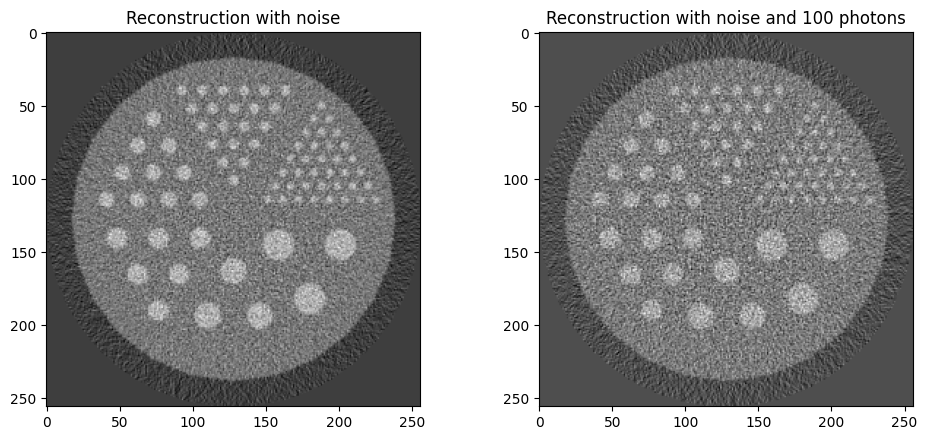

The range of values of the image is: 0.0 to 1.0


In [19]:
# decrease the number of photons --> worse SNR

# change to 100 photons

sinogram_int = (sinogram*100)/(np.max(sinogram))
sin_auxf_int = sinogram_int.astype(np.uint8)


sin_noiseint = np.random.poisson(sin_auxf_int, size = np.shape(sinogram_int))

# reconstruct the image with the decreased number of photons
reconstruction_noise_int = sk.transform.iradon(sin_noiseint, theta=theta, circle = True, output_size = 256)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
ax1.set_title("Reconstruction with noise")
ax1.imshow(reconstruction_noise,cmap="gray")
ax2.set_title("Reconstruction with noise and 100 photons")
ax2.imshow(reconstruction_noise_int, cmap='gray')
fig.tight_layout()
plt.show()
# normalize the image
reconstruction_noise_int = (reconstruction_noise_int-np.min(reconstruction_noise_int))/(np.max(reconstruction_noise_int)-np.min(reconstruction_noise_int))

# print range of values of the image
print("The range of values of the image is: " + str(np.min(reconstruction_noise_int)) + " to " + str(np.max(reconstruction_noise_int)))

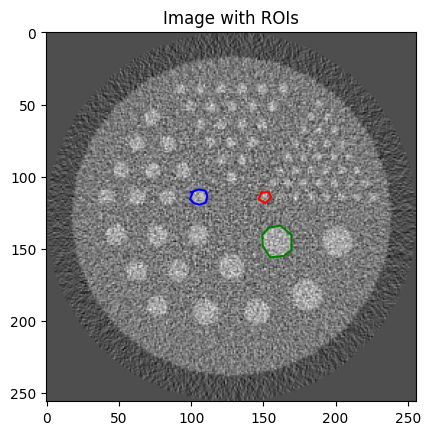

In [20]:
# display the image with the rois
plt.figure()
plt.title('Image with ROIs')
plt.imshow(reconstruction_noise_int, cmap='gray')
small_roi.display_roi()
med_roi.display_roi()
big_roi.display_roi()

In [30]:
# calculate the average intensity in the ROIs for the reconstruction with noise
average_small_int = np.mean(reconstruction_noise_int[small_mask])
average_med_int = np.mean(reconstruction_noise_int[med_mask])
average_big_int = np.mean(reconstruction_noise_int[big_mask])

# get std for each RO
std_small_100p = np.std(reconstruction_noise_int[small_mask])
std_med_100p = np.std(reconstruction_noise_int[med_mask])
std_big_100p = np.std(reconstruction_noise_int[big_mask])


# calculate SNR for each ROI rec with noise
snr_small_rec_noise_int = average_small_int/std_small_100p
snr_med_rec_noise_int = average_med_int/std_med_100p
snr_big_rec_noise_int = average_big_int/std_big_100p

print('\x1b[1;31m' + "For the small ROI, the average intensity and SNR are: " + '\x1b[0m')
print("Average intensity (reconstruction with noise): " + str(round(average_small_noise,3)))
print("Average intensity (reconstruction with noise and 100 photons): " + str(round(average_small_int,3)))
print("SNR (reconstruction with noise): " + str(round(snr_small_rec_noise,3)))
print("SNR (reconstruction with noise and 100 photons): " + str(round(snr_small_rec_noise_int,3)) + "\n")

print('\x1b[1;31m'+ "For the medium ROI, the average intensity and SNR are: " + '\x1b[0m')
print("Average intensity (reconstruction with noise): " + str(round(average_med_noise,3)))
print("Average intensity (reconstruction with noise and 100 photons): " + str(round(average_med_int,3)))
print("SNR (reconstruction with noise): " + str(round(snr_med_rec_noise,3)))
print("SNR (reconstruction with noise and 100 photons): " + str(round(snr_med_rec_noise_int,3)) + "\n")

print('\x1b[1;31m' + "For the big ROI, the average intensity and SNR are: " + '\x1b[0m')
print("Average intensity (reconstruction with noise): " + str(round(average_big_noise,3)))
print("Average intensity (reconstruction with noise and 100 photons): " + str(round(average_big_int,3)))
print("SNR (reconstruction with noise): " + str(round(snr_big_rec_noise,3)))
print("SNR (reconstruction with noise): " + str(round(snr_big_rec_noise_int,3)) + "\n")




For the small ROI, the average intensity and SNR are: 
Average intensity (reconstruction with noise): 0.568
Average intensity (reconstruction with noise and 100 photons): 0.572
SNR (reconstruction with noise): 4.476
SNR (reconstruction with noise and 100 photons): 4.742

For the medium ROI, the average intensity and SNR are: 
Average intensity (reconstruction with noise): 0.644
Average intensity (reconstruction with noise and 100 photons): 0.63
SNR (reconstruction with noise): 6.803
SNR (reconstruction with noise and 100 photons): 5.706

For the big ROI, the average intensity and SNR are: 
Average intensity (reconstruction with noise): 0.672
Average intensity (reconstruction with noise and 100 photons): 0.645
SNR (reconstruction with noise): 7.332
SNR (reconstruction with noise): 5.686



Decreasing the count of photons, decreases both the signal and the noise. However, the signal decreases more than the noise, which leads to a smaller SNR. In this case, we avoid the trade-off between SNR and spatial resolution. Controlling the maximum number of photons counted, we can increase or decrease the SNR while maintaining the spatial resolution. The maximum number of photons needs to be adjusted taking into consideration safety measures for the patient and radiotracer half life, for example.

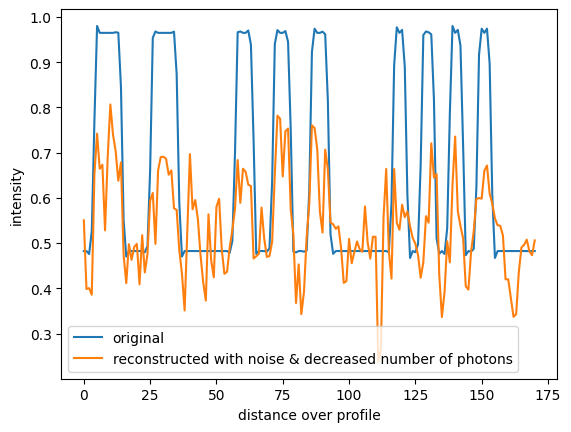

In [46]:
# profile line intensity with decreased number of photons

# define a profile line and get intensities in the og image
prof = sk.measure.profile_line(derenzo_im, (77.0, 53.3), (77.0, 223.3), linewidth=1)
# same profile along the reconstructed image
prof_rec = sk.measure.profile_line(reconstruction, (77.0, 53.3), (77.0, 223.3), linewidth=1)
# same profile along the reconstructed image with noise and an increased number of photons
prof_rec_noise_int = sk.measure.profile_line(reconstruction_noise_int, (77.0, 53.3),(77.0, 223.3), linewidth=1)

plt.figure()
plt.plot(prof)
#plt.plot(prof_rec_noise)
plt.plot(prof_rec_noise_int)
plt.legend(['original','reconstructed with noise & decreased number of photons'])
plt.ylabel('intensity')
plt.xlabel('distance over profile')
plt.show()

With 100 photons, the image is very faded, the hotspots are almost blending in with the background. This leads to very small intensity peaks along the profile line, these intensity peaks merge with the noise's intensity peaks. 

Increasing the count of photons

The range of values in the image is: 0.0 to 1.0


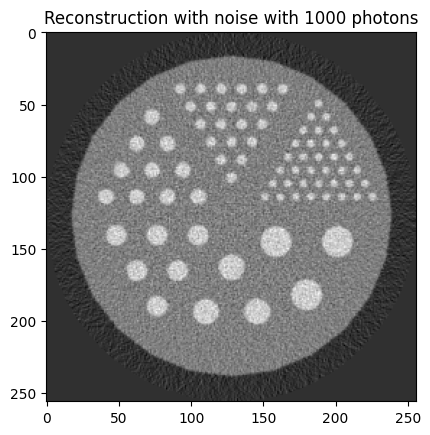

In [25]:
# increased number of photons --> better SNR

# change to 1000 photons

sinogram_int1000 = (sinogram*1000)/(np.max(sinogram))
sin_auxf_int1000 = sinogram_int1000.astype(np.uint16)
sin_noiseint1000 = np.random.poisson(sin_auxf_int1000, size = np.shape(sinogram_int1000))

# reconstruct the image with the increased number of photons
reconstruction_noise_int1000 = sk.transform.iradon(sin_noiseint1000, theta=theta, circle = True, output_size = 256)

# normalize the image
reconstruction_noise_int1000 = (reconstruction_noise_int1000-np.min(reconstruction_noise_int1000))/(np.max(reconstruction_noise_int1000)-np.min(reconstruction_noise_int1000))
# print range of values
print("The range of values in the image is: " + str(np.min(reconstruction_noise_int1000)) + " to " + str(np.max(reconstruction_noise_int1000)))

# display the image
plt.figure()
plt.title('Reconstruction with noise with 1000 photons')
plt.imshow(reconstruction_noise_int1000, cmap='gray')
plt.show()



In [32]:
# calculate the average intensity in the ROIs for the reconstruction with noise
average_small_int1000 = np.mean(reconstruction_noise_int1000[small_mask])
average_med_int1000 = np.mean(reconstruction_noise_int1000[med_mask])
average_big_int1000 = np.mean(reconstruction_noise_int1000[big_mask])

# get std for each RO
std_small_1000p = np.std(reconstruction_noise_int1000[small_mask])
std_med_1000p = np.std(reconstruction_noise_int1000[med_mask])
std_big_1000p = np.std(reconstruction_noise_int1000[big_mask])

# calculate SNR for each ROI rec with noise
snr_small_rec_noise_int1000 = average_small_int1000/std_small_1000p
snr_med_rec_noise_int1000 = average_med_int1000/std_med_1000p
snr_big_rec_noise_int1000 = average_big_int1000/std_big_1000p

print('\x1b[1;31m' + "For the small ROI, the average intensity and SNR are: " + '\x1b[0m')
print("Average intensity (original image): " + str(round(average_small,3)))
print("Average Intensity (reconstruction with noise): " + str(round(average_small_noise,3)))
print("Average intensity (reconstruction with noise and 1000 photons): " + str(round(average_small_int1000,3)))
print("SNR (reconstruction with noise): " + str(round(snr_small_rec_noise,3)))
print("SNR (reconstruction with noise and 1000 photons): " + str(round(snr_small_rec_noise_int1000,3)) + "\n")

print('\x1b[1;31m' + "For the medium ROI, the average intensity and SNR are: " + '\x1b[0m')
print("Average intensity (original image): " + str(round(average_med,3)))
print("Average intensity (reconstruction with noise): " + str(round(average_med_noise,3)))
print("Average intensity (reconstruction with noise and 1000 photons): " + str(round(average_med_int1000,3)))
print("SNR (reconstruction with noise): " + str(round(snr_med_rec_noise,3)))
print("SNR (reconstruction with noise and 1000 photons): " + str(round(snr_med_rec_noise_int1000,3)) + "\n")

print('\x1b[1;31m' + "For the big ROI, the average intensity and SNR are: " + '\x1b[0m')
print("Average intensity (original image): " + str(round(average_big,3)))
print("Average intensity (reconstruction with noise): " + str(round(average_big_noise,3)))
print("Average intensity (reconstruction with noise and 1000 photons): " + str(round(average_big_int1000,3)))
print("SNR (reconstruction with noise): " + str(round(snr_big_rec_noise,3)))
print("SNR (reconstruction with noise and 1000 photons): " + str(round(snr_big_rec_noise_int1000,3)) + "\n")



For the small ROI, the average intensity and SNR are: 
Average intensity (original image): 0.72
Average Intensity (reconstruction with noise): 0.568
Average intensity (reconstruction with noise and 1000 photons): 0.646
SNR (reconstruction with noise): 4.476
SNR (reconstruction with noise and 1000 photons): 5.69

For the medium ROI, the average intensity and SNR are: 
Average intensity (original image): 0.903
Average intensity (reconstruction with noise): 0.644
Average intensity (reconstruction with noise and 1000 photons): 0.756
SNR (reconstruction with noise): 6.803
SNR (reconstruction with noise and 1000 photons): 8.369

For the big ROI, the average intensity and SNR are: 
Average intensity (original image): 0.938
Average intensity (reconstruction with noise): 0.672
Average intensity (reconstruction with noise and 1000 photons): 0.783
SNR (reconstruction with noise): 7.332
SNR (reconstruction with noise and 1000 photons): 9.484



The average intesities using 1000 photons are closer those of the original image tham the average intensities using 255.

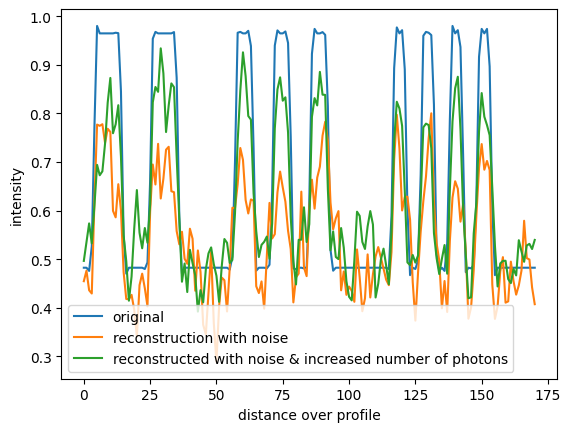

In [45]:
# profile line intensity with decreased number of photons

# define a profile line and get intensities in the og image
prof = sk.measure.profile_line(derenzo_im, (77.0, 53.3), (77.0, 223.3), linewidth=1)
# same profile along the reconstructed image
prof_rec = sk.measure.profile_line(reconstruction, (77.0, 53.3), (77.0, 223.3), linewidth=1)
# same profile along the reconstructed image with noise and an increased number of photons
prof_rec_noise_int1000 = sk.measure.profile_line(reconstruction_noise_int1000, (77.0, 53.3), (77.0, 223.3), linewidth=1)

plt.figure()
plt.plot(prof)
plt.plot(prof_rec_noise)
plt.plot(prof_rec_noise_int1000)
plt.legend(['original', "reconstruction with noise", 'reconstructed with noise & increased number of photons'])
plt.ylabel('intensity')
plt.xlabel('distance over profile')
plt.show()

By increasing the number of photons, the SNR in all hotspots also increases, as we were expecting.

Changing the number of steps in the Radon Transform

The range of values of the reconstructed image is 0.0 to 1.0


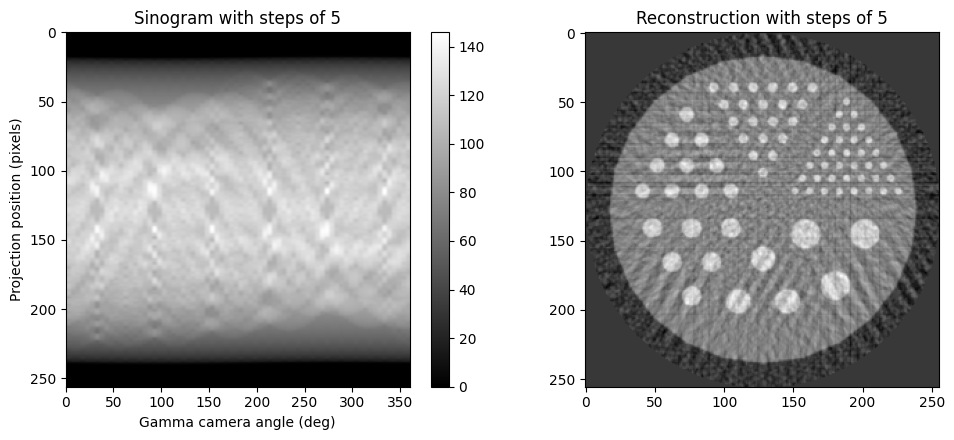

(256, 256)
The range of values of the reconstructed image with noise is 0.0 to 1.0


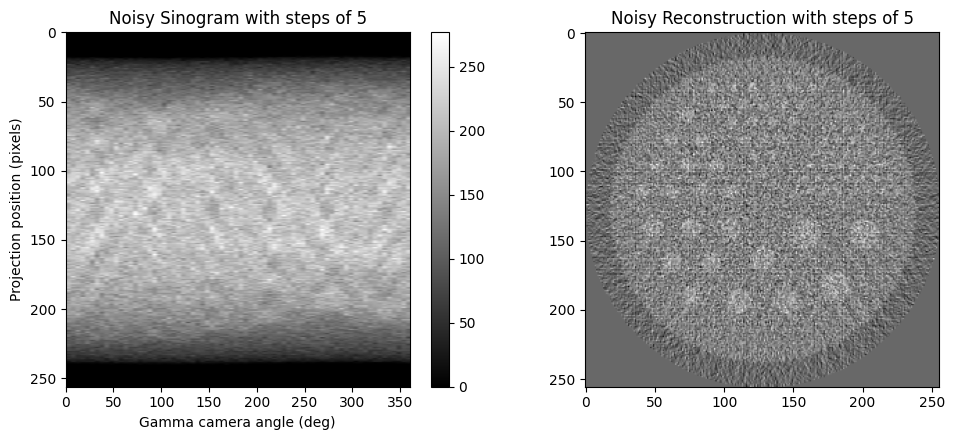

In [35]:
# sinogram and reconstruction without noise

# get the sinogram

# build a theta vector from 0 to 359 with a step of 5
theta5 = np.arange(0, 360, 5)

sinogram5 = sk.transform.radon(derenzo_im, theta=theta5, preserve_range=True)

# reconstruct
reconstruction5 = sk.transform.iradon(sinogram5, theta=theta5, circle=True, output_size = 256)
# normalize the image
reconstruction5 = (reconstruction5-np.min(reconstruction5))/(np.max(reconstruction5)-np.min(reconstruction5))
# check normalization, print the range of values
print("The range of values of the reconstructed image is " + str(np.min(reconstruction5)) + " to " + str(np.max(reconstruction5)))


# display sinogram and reconstruction in the same figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
ax1.set_title("Sinogram with steps of 5")
ax1.set_xlabel("Gamma camera angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
sincb = ax1.imshow(sinogram5, cmap='gray', extent=[0, 360, 256, 0], aspect='auto')
ax2.set_title("Reconstruction with steps of 5")
ax2.imshow(reconstruction5, cmap='gray')
fig.tight_layout()
plt.colorbar(sincb)
plt.show()

# get the size of the rec

rec_size5 = np.shape(reconstruction5)
print(rec_size5)

# sinogram and reconstruction with noise

sin_aux5 = (sinogram5*255)/(np.max(sinogram5))
sin_auxf5 = sin_aux5.astype(np.uint8)
sin_noise5 = np.random.poisson(sin_auxf5, size = np.shape(sin_aux5))

# reconstruct
reconstruction_noise5 = sk.transform.iradon(sin_noise5, theta=theta5, circle = True, output_size = 256)
# normalize the image
reconstruction_noise5 = (reconstruction_noise5-np.min(reconstruction_noise5))/(np.max(reconstruction_noise5)-np.min(reconstruction_noise5))
# check normalization, print the range of values
print("The range of values of the reconstructed image with noise is " + str(np.min(reconstruction_noise5)) + " to " + str(np.max(reconstruction_noise5)))

# display noisy sinogram and reconstruction in the same figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
ax1.set_title("Noisy Sinogram with steps of 5")
ax1.set_xlabel("Gamma camera angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
sincb15 = ax1.imshow(sin_noise5, cmap='gray', extent=[0, 360, 256, 0], aspect='auto')
ax2.set_title("Noisy Reconstruction with steps of 5")
ax2.imshow(reconstruction_noise5, cmap='gray')
fig.tight_layout()
plt.colorbar(sincb15)
plt.show()



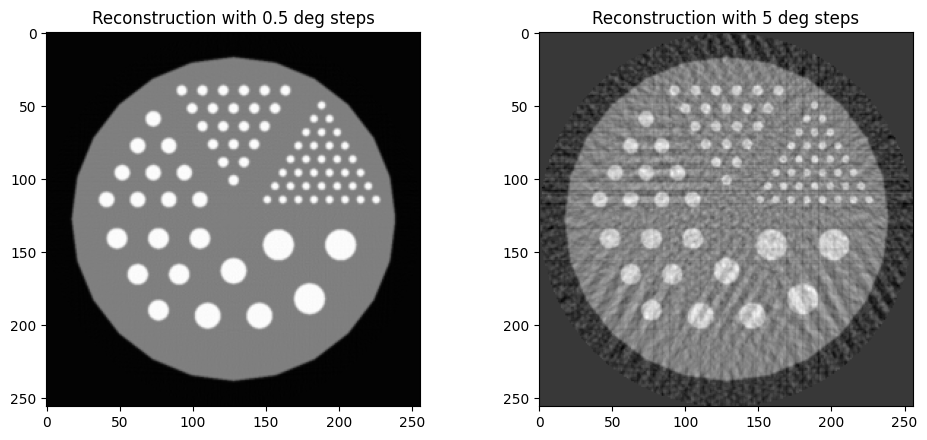

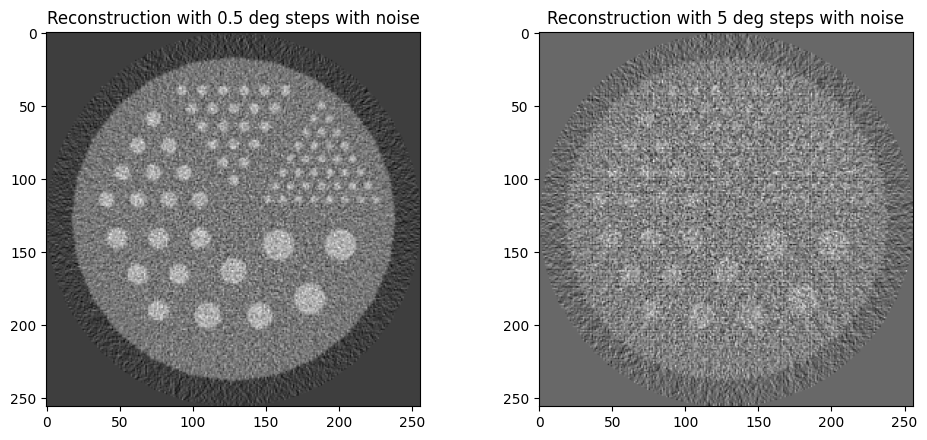

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
ax1.set_title("Reconstruction with 0.5 deg steps")
ax1.imshow(reconstruction,cmap="gray")
ax2.set_title("Reconstruction with 5 deg steps")
ax2.imshow(reconstruction5, cmap='gray')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
ax1.set_title("Reconstruction with 0.5 deg steps with noise")
ax1.imshow(reconstruction_noise,cmap="gray")
ax2.set_title("Reconstruction with 5 deg steps with noise")
ax2.imshow(reconstruction_noise5, cmap='gray')
fig.tight_layout()
plt.show()

By increasing the acquistion degree step, we're generating a sinogram with more discontinuities, which in turn produces a reconstruction with more streaky artifacts, so more noisy. These artifacts can get overlaid on top of hotspots, and thus locally jeopardize image resolution. Regarding the addition of noise, we can see that it produces similiar effects to the acquisition done with a 0.5 degree step, but with a bigger degree step there's a noticable decrease of the SNR.

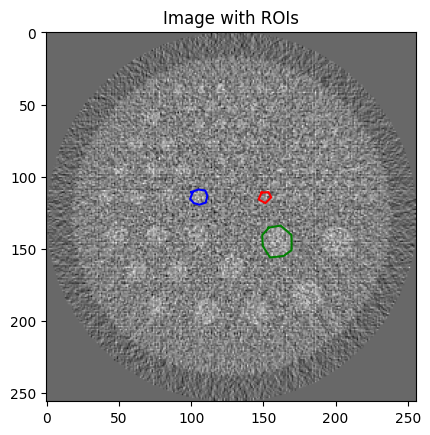

In [37]:
# display ROIs over the noisy reconstruction
plt.figure()
plt.title('Image with ROIs')
plt.imshow(reconstruction_noise5, cmap='gray')
small_roi.display_roi()
med_roi.display_roi()
big_roi.display_roi()

In [38]:
# calculate average intensity in each roi
average_small5 = np.mean(reconstruction_noise5[small_mask])
average_med5 = np.mean(reconstruction_noise5[med_mask])
average_big5 = np.mean(reconstruction_noise5[big_mask])

# get the differences between the original average intensity
dif_small5 = average_small - average_small5
dif_med5 = average_med - average_med5
dif_big5 = average_big - average_big5

#SNRs
snr_small5 = np.mean(reconstruction_noise5[small_mask])/np.std(reconstruction_noise5[small_mask])
snr_med5 = np.mean(reconstruction_noise5[med_mask])/np.std(reconstruction_noise5[med_mask])
snr_big5 = np.mean(reconstruction_noise5[big_mask])/np.std(reconstruction_noise5[big_mask])

# print 
print('\x1b[1;31m' + "For the small ROI, the average intensities are: " + '\x1b[0m')
print("Original Image: " + str(round(average_small,3)))
print("Reconstruction with Noise (with 0.5 step): " + str(round(average_small_noise,3)))
print("Difference between 0.5 step rec and the original: " + str(round(dif_small,3)))
print("Reconstruction with Noise (5 step): " + str(round(average_small5,3)))
print("Difference between 5 step rec and the original: " + str(round(dif_small5,3)) + "\n")

print('\x1b[1;31m' + "For the small ROI, the SNRs are: " + '\x1b[0m')
print("Reconstruction with Noise (with 0.5 step): " + str(round(snr_small_rec_noise,3)))
print("Reconstruction with Noise (5 step): " + str(round(snr_small5,3)) + "\n")

print('\x1b[1;31m' + "For the medium ROI, the average intensities are: " + '\x1b[0m')
print("Original Image: " + str(round(average_med,3)))
print("Reconstruction with Noise (with 0.5 step): " + str(round(average_med_noise,3)))
print("Difference between 0.5 step rec and the original: " +  str(round(dif_med,3)))
print("Reconstruction with Noise (5 step): " + str(round(average_med5,3)))
print("Difference between 5 step rec and the original: " + str(round(dif_med5,3)) + "\n")

print('\x1b[1;31m' + "For the medium ROI, the average SNRs are: " + '\x1b[0m')
print("Reconstruction with Noise (with 0.5 step): " + str(round(snr_med_rec_noise,3)))
print("Reconstruction with Noise (5 step): " + str(round(snr_med5,3)) + "\n")


print('\x1b[1;31m' + "For the big ROI, the average intensity and SNR are: " + '\x1b[0m')
print("Original Image: " + str(round(average_big,3)))
print("Reconstruction with Noise (with 0.5 step): " + str(round(average_big_noise,3)))
print("Difference between 0.5 step rec and the original: " + str(round(dif_big,3)))
print("Reconstruction with Noise (5 step): " + str(round(average_big5,3)))
print("Difference between 5 step rec and the original: " + str(round(dif_big5,3)) + "\n")

print('\x1b[1;31m' + "For the big ROI, the average SNRs are: " + '\x1b[0m')
print("Reconstruction with Noise (with 0.5 step): " + str(round(snr_big_rec_noise,3)))
print("Reconstruction with Noise (5 step): " + str(round(snr_big5,3)) + "\n")


For the small ROI, the average intensities are: 
Original Image: 0.72
Reconstruction with Noise (with 0.5 step): 0.568
Difference between 0.5 step rec and the original: 0.152
Reconstruction with Noise (5 step): 0.526
Difference between 5 step rec and the original: 0.195

For the small ROI, the SNRs are: 
Reconstruction with Noise (with 0.5 step): 4.476
Reconstruction with Noise (5 step): 3.783

For the medium ROI, the average intensities are: 
Original Image: 0.903
Reconstruction with Noise (with 0.5 step): 0.644
Difference between 0.5 step rec and the original: 0.259
Reconstruction with Noise (5 step): 0.588
Difference between 5 step rec and the original: 0.315

For the medium ROI, the average SNRs are: 
Reconstruction with Noise (with 0.5 step): 6.803
Reconstruction with Noise (5 step): 4.496

For the big ROI, the average intensity and SNR are: 
Original Image: 0.938
Reconstruction with Noise (with 0.5 step): 0.672
Difference between 0.5 step rec and the original: 0.266
Reconstructio

As expected, the differences between the average ROI intensities are bigger when using a 5 degree step reconstruction: the reconstrucition is noisier and blurrier and as a result there's underestimation of the hotspot's activity by PVEs. Aditionally, the SNR decreases, which was already anticipated (even visually) since we're adding discontinuities.

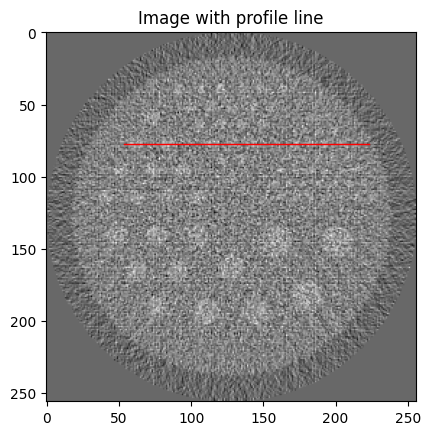

In [39]:
# intensity along profile line

x1 = [53.3, 223.3]
y1 = [77.0,77.0]

plt.figure()
plt.imshow(reconstruction_noise5, cmap='gray')
plt.plot(x1, y1, color="red", linewidth=1)
plt.title('Image with profile line')
plt.show()

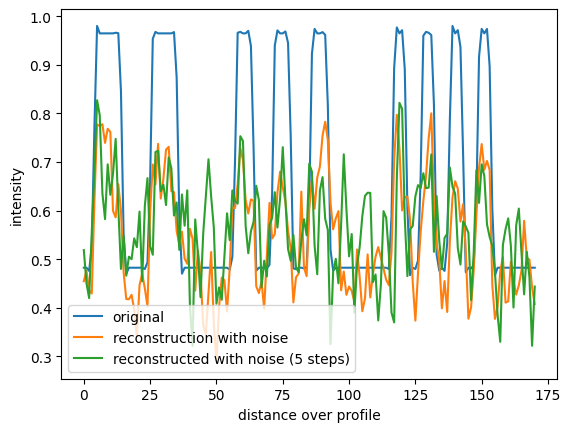

In [41]:
# profile line intensity with decreased number of photons

prof_rec_noise_5 = sk.measure.profile_line(reconstruction_noise5, (77.0, 53.3), (77.0, 223.3), linewidth=1)

plt.figure()
plt.plot(prof)
plt.plot(prof_rec_noise)
plt.plot(prof_rec_noise_5)
plt.legend(['original', "reconstruction with noise" ,'reconstructed with noise (5 steps)'])
plt.ylabel('intensity')
plt.xlabel('distance over profile')
plt.show()

With a 5 degree step, the SNR decrease is much more noticable on the profile line measurement and so it's much harder to distinguish signal intensity peaks from noise intensity peaks. Thus, the insensitivity to the detection of hot spots due to PVEs is one of the consequences that one must consider when choosing an aquisition degree step.  